# MACHINE LEARNING IN 6 HOURS

#    # LINEAR REGRESSION

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [41]:
#importing the dataset and extracting the independent and dependent variables
housing  = pd.read_csv("~/Documents/datasets/housing.csv")
cols = list(housing.columns.values)

# we shift what we want to predict to the extreme end of the table 
#be careful when hardcoding numbers fordata that can change
housing = housing[cols[0:7] + [cols[-1]] + cols[7:9]]
housing = housing.drop("total_bedrooms", axis=1)
#X is no longer a dataframe ,but a bunch of arrays
X = housing.iloc[:,:-1].values
y = housing.iloc[:, 8].values
#print to check if y is the median_house value(which we want to predict
print(housing.isnull().sum())
print(y)
housing.head()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
population            0
households            0
ocean_proximity       0
median_income         0
median_house_value    0
dtype: int64
[452600. 358500. 352100. ...  92300.  84700.  89400.]


,longitude,latitude,housing_median_age,total_rooms,population,households,ocean_proximity,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,322.0,126.0,NEAR BAY,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,NEAR BAY,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,496.0,177.0,NEAR BAY,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,NEAR BAY,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,NEAR BAY,3.8462,342200.0


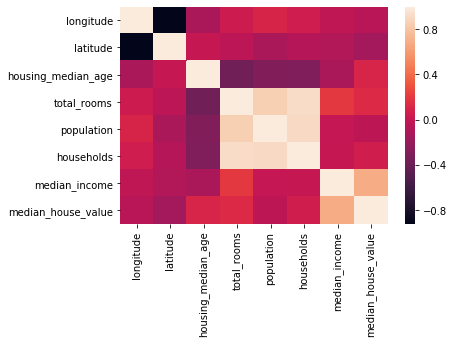

<Figure size 1080x720 with 0 Axes>

In [42]:
# Data visualisation
# Building the Correlation matrix
sns.heatmap(housing.corr())
plt.figure(figsize=(15,10))
plt.show()

In [43]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder = LabelEncoder()
X[:, 6] = labelencoder.fit_transform(X[:, 6])

onehotencoder = OneHotEncoder(categorical_features = [6])
X = onehotencoder.fit_transform(X).toarray()
